In [1]:
#importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy
from scipy.stats import entropy
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM
import plotly.express as px
import plotly.graph_objects as go
import optuna
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy
# from scipy.stats import entropy
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,f1_score,classification_report
# from sklearn import preprocessing
# import xgboost as xgb
# import catboost as cb
# import lightgbm as lgbm
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# import plotly.express as px
# import plotly.graph_objects as go
# import optuna

In [4]:
#Data paths

dataset_path_2nd = 'C:/Users/tmade/DissProject/mlbearing/notebook/bearing//2nd_test/2nd_test'


In [5]:
files = os.listdir('C:/Users/tmade/DissProject/mlbearing/notebook/bearing//2nd_test/2nd_test')
file_head = files[:12]  # Change the number to specify the desired number of files

df = pd.DataFrame(file_head, columns=["File Name"])
print(df.head(8))

             File Name
0  2004.02.12.10.32.39
1  2004.02.12.10.42.39
2  2004.02.12.10.52.39
3  2004.02.12.11.02.39
4  2004.02.12.11.12.39
5  2004.02.12.11.22.39
6  2004.02.12.11.32.39
7  2004.02.12.11.42.39


In [ ]:
# import os
# dataset_path_2nd = '../content/drive/MyDrive/Bearing/2nd_test/2nd_test'
# data_list = []
# for filename in os.listdir(dataset_path_2nd):
#     file_path = os.path.join(dataset_path_2nd, filename)
#     chunk_reader = pd.read_csv(file_path, chunksize=10000)  # Adjust the chunksize as needed
#     for chunk in chunk_reader:
#         data_list.append(chunk)

# vib_data = pd.concat(data_list, ignore_index=True)

In [6]:
df = pd.read_csv('bearing/2nd_test/2nd_test/2004.02.12.10.32.39', sep='\t')
df

,-0.049,-0.071,-0.132,-0.010
0,-0.042,-0.073,-0.007,-0.105
1,0.015,0.000,0.007,0.000
2,-0.051,0.020,-0.002,0.100
3,-0.107,0.010,0.127,0.054
4,-0.078,-0.212,0.042,-0.044
...,...,...,...,...
20474,0.049,-0.051,-0.039,-0.044
20475,0.037,0.061,0.115,0.007
20476,-0.012,0.007,0.056,-0.007
20477,-0.012,0.093,0.017,-0.044


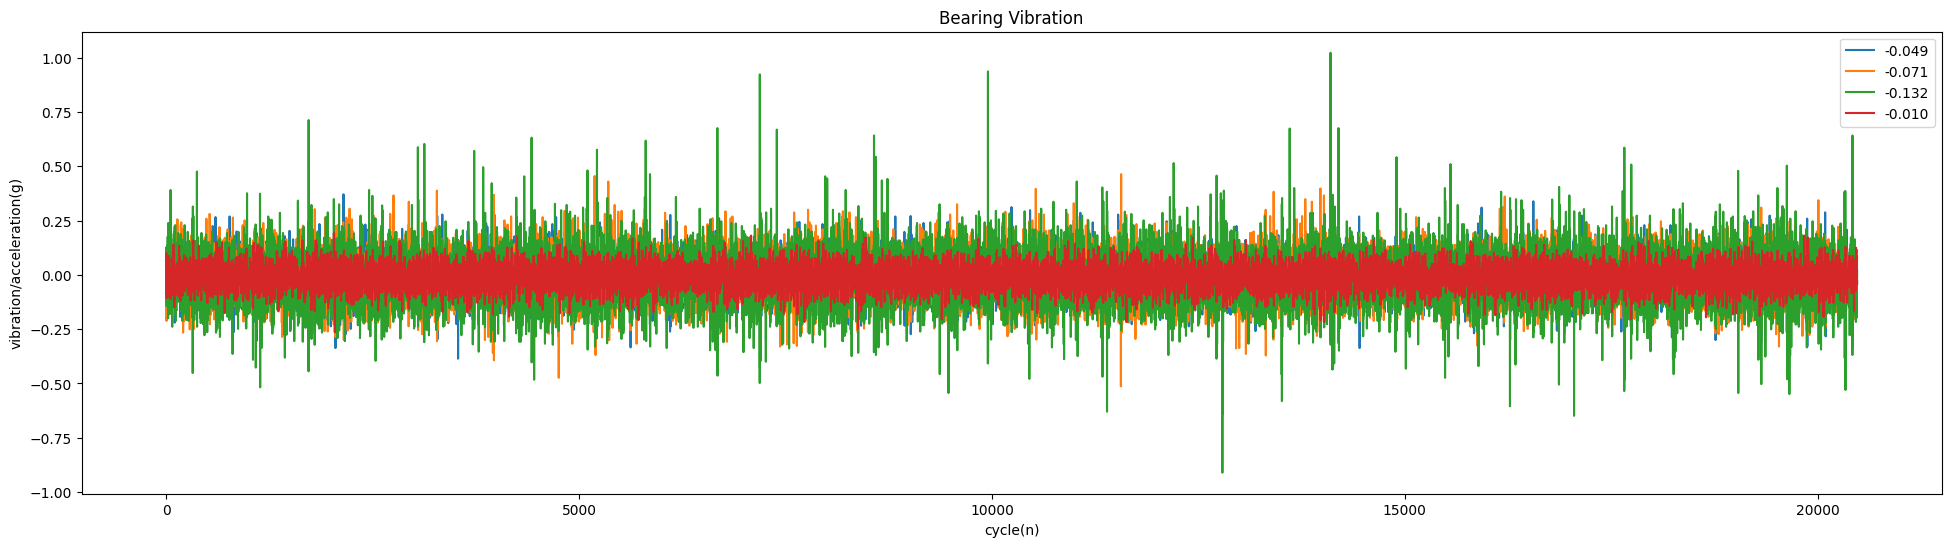

In [7]:
# Test for the first file
dataset = pd.read_csv('bearing/2nd_test/2nd_test/2004.02.12.10.32.39', sep='\t')
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()


In [ ]:
# # Frequencies for FFT (assuming uniformly spaced time points)
# sampling_rate = 20000  # Adjust this based on your actual sampling rate
# num_samples = len(set1)  # Number of samples in my data
# frequencies = fftfreq(num_samples, d=1/sampling_rate)  # Frequencies in Hz

# # Calculate FFT magnitudes for the selected columns
# selected_columns = ['B1_mean', 'B1_std', 'B1_skew', 'B1_kurtosis', 'B1_entropy', 'B1_rms', 'B1_max', 'B1_p2p', 'B1_crest', 'B1_clearence', 'B1_shape', 'B1_impulse']
# magnitudes_combined = np.abs(np.fft.fft(set1[selected_columns].values, axis=0))

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.plot(frequencies, magnitudes_combined)
# plt.title('Frequency-Domain Vibration Data (Combined)')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.show()


# # Frequencies for FFT (assuming uniformly spaced time points)
# sampling_rate = 20000  # Adjust this based on your actual sampling rate in Hz
# num_samples = len(set1)  # Number of samples in your data
# frequencies = fftfreq(num_samples, d=1/sampling_rate)  # Frequencies in Hz

# # Calculate FFT magnitudes for each selected column
# selected_columns = ['B1_mean', 'B1_std', 'B1_kurtosis', 'B1_rms', 'B2_mean', 'B2_std', 'B2_kurtosis', 'B2_rms',
#                      'B3_mean', 'B3_std', 'B3_kurtosis', 'B3_rms', 'B4_mean', 'B4_std', 'B4_kurtosis', 'B4_rms']
# for col in selected_columns:
#     magnitudes = np.abs(np.fft.fft(set1[col].values))
    
#     # Plotting
#     plt.figure(figsize=(12, 6))
#     plt.plot(frequencies, magnitudes)
#     plt.title(f'Frequency-Domain Vibration Data for {col}')
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Magnitude')
#     plt.grid(True)
#     plt.show()

**Feature Extraction**

In this section several signal-based statistical features has been extracted from the data

In [8]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result


In [9]:
def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']

    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)



    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')

        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs

        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])

        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])

        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename]

        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        data = pd.concat([data, merge])

    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]

    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data

#Calling feature extraction function defined above to merge extracted features.

In [10]:
#Saving as .csv file
set2 = time_features(dataset_path_2nd, id_set=2)
set2.to_csv('set2_timefeatures.csv')

In [11]:
set2 = pd.read_csv("./set2_timefeatures.csv") #Reading the data again

In [12]:
#Changing indexing column to time which is also name of the each file
set2 = set2.rename(columns={'Unnamed: 0':'time'})
set2.set_index('time')
set2.describe()
set2.head()

,time,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,...,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse
0,2004-02-12 10:32:39,0.058333,0.073478,0.083929,0.629118,4.811406,0.074180,0.454,0.840,6.120246,...,-0.022081,0.066118,4.494251,0.054105,0.264,0.457,4.879424,0.036259,1.256305,6.130047
1,2004-02-12 10:42:39,0.058995,0.075339,0.052054,0.648930,4.835310,0.075382,0.388,0.757,5.147132,...,0.001645,0.107769,4.545837,0.056102,0.249,0.478,4.438343,0.037465,1.259558,5.590350
2,2004-02-12 10:52:39,0.060236,0.076189,0.032869,0.514258,4.848343,0.076228,0.503,0.903,6.598658,...,0.070516,0.257503,4.544783,0.056146,0.354,0.688,6.304948,0.037331,1.263332,7.965243
3,2004-02-12 11:02:39,0.061455,0.078694,0.041523,1.158352,4.761551,0.078726,0.608,1.184,7.723037,...,-0.036409,0.806635,4.553737,0.056808,0.525,1.038,9.241630,0.037989,1.260124,11.645601
4,2004-02-12 11:12:39,0.061361,0.078440,0.028134,0.603647,4.875062,0.078475,0.391,0.782,4.982488,...,0.019103,0.139316,4.560105,0.056841,0.244,0.456,4.292638,0.037949,1.259831,5.407997


Plotting features of all bearings in Set No 2

bearing detail ['B1', 'B2', 'B3', 'B4']


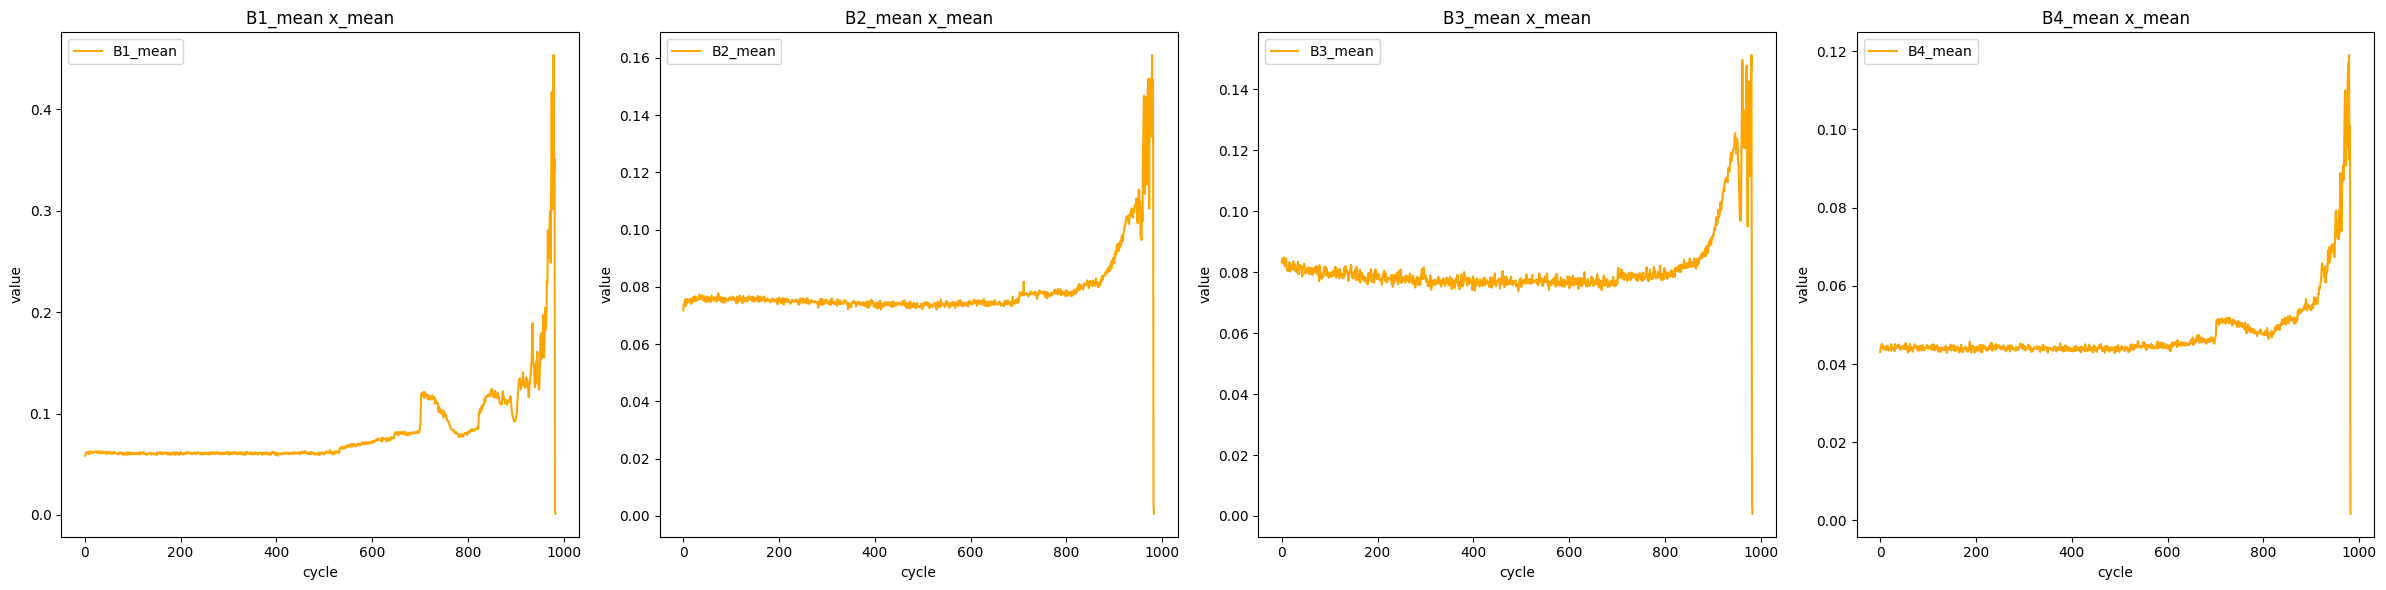

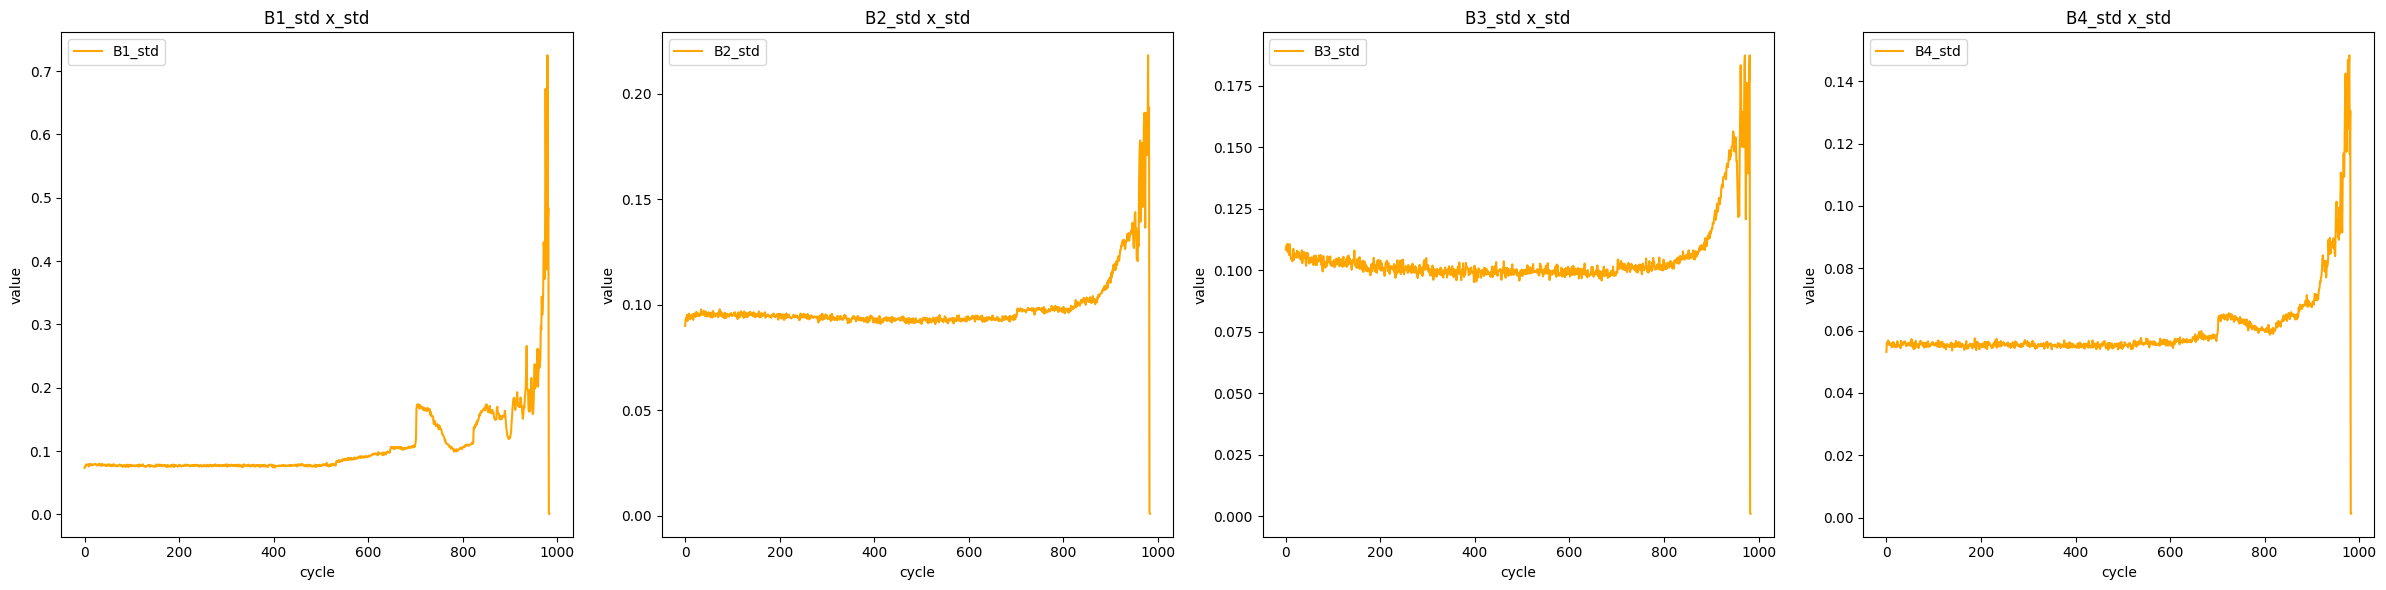

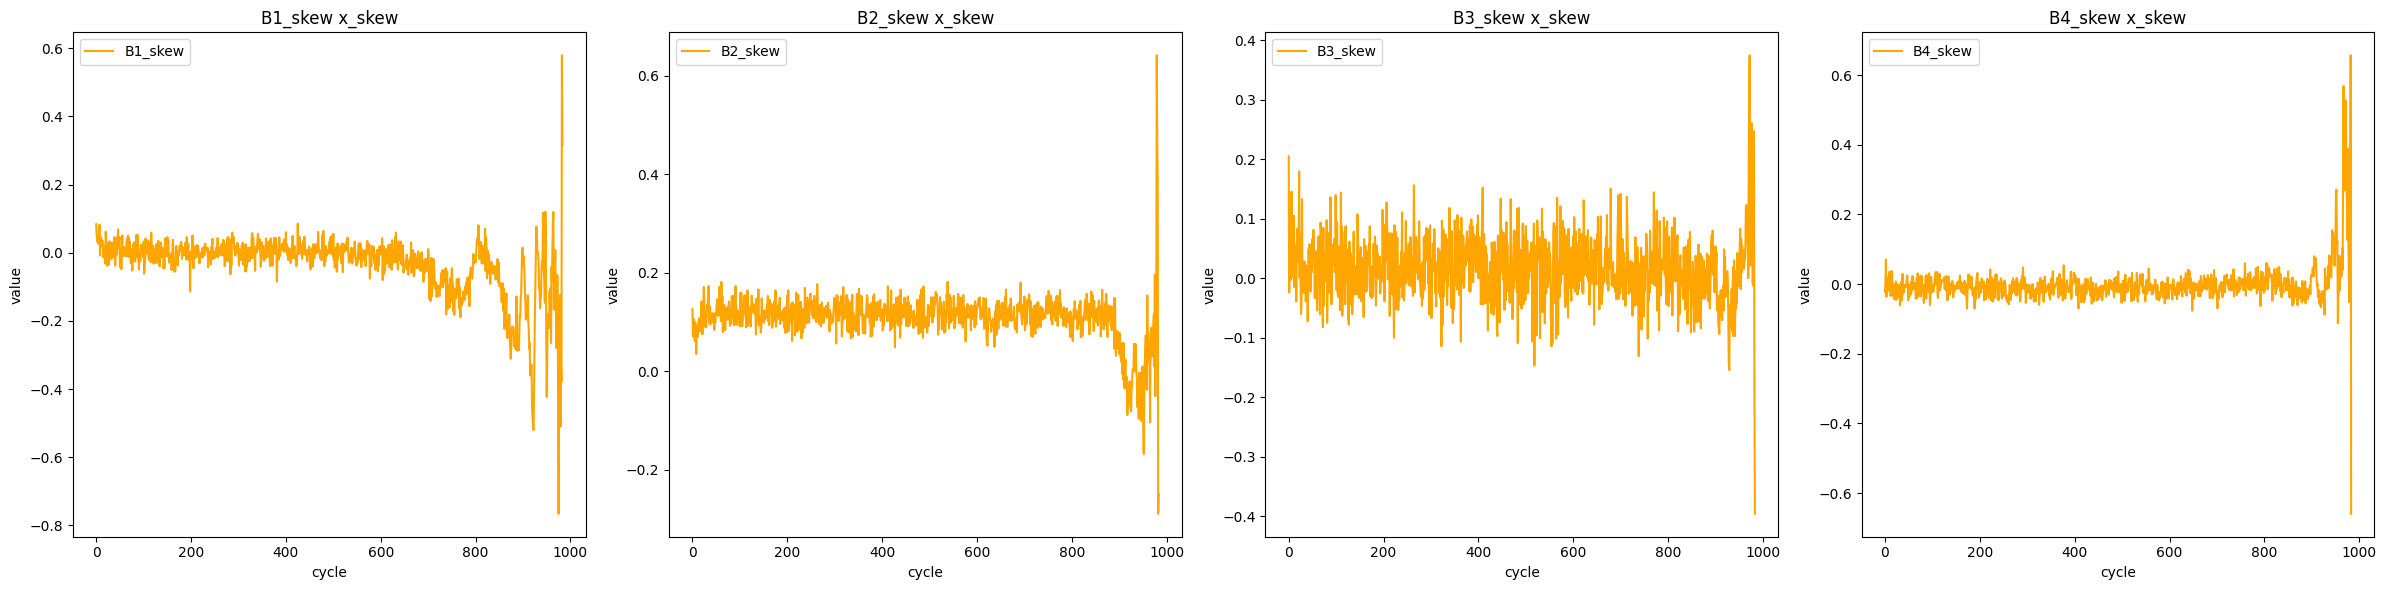

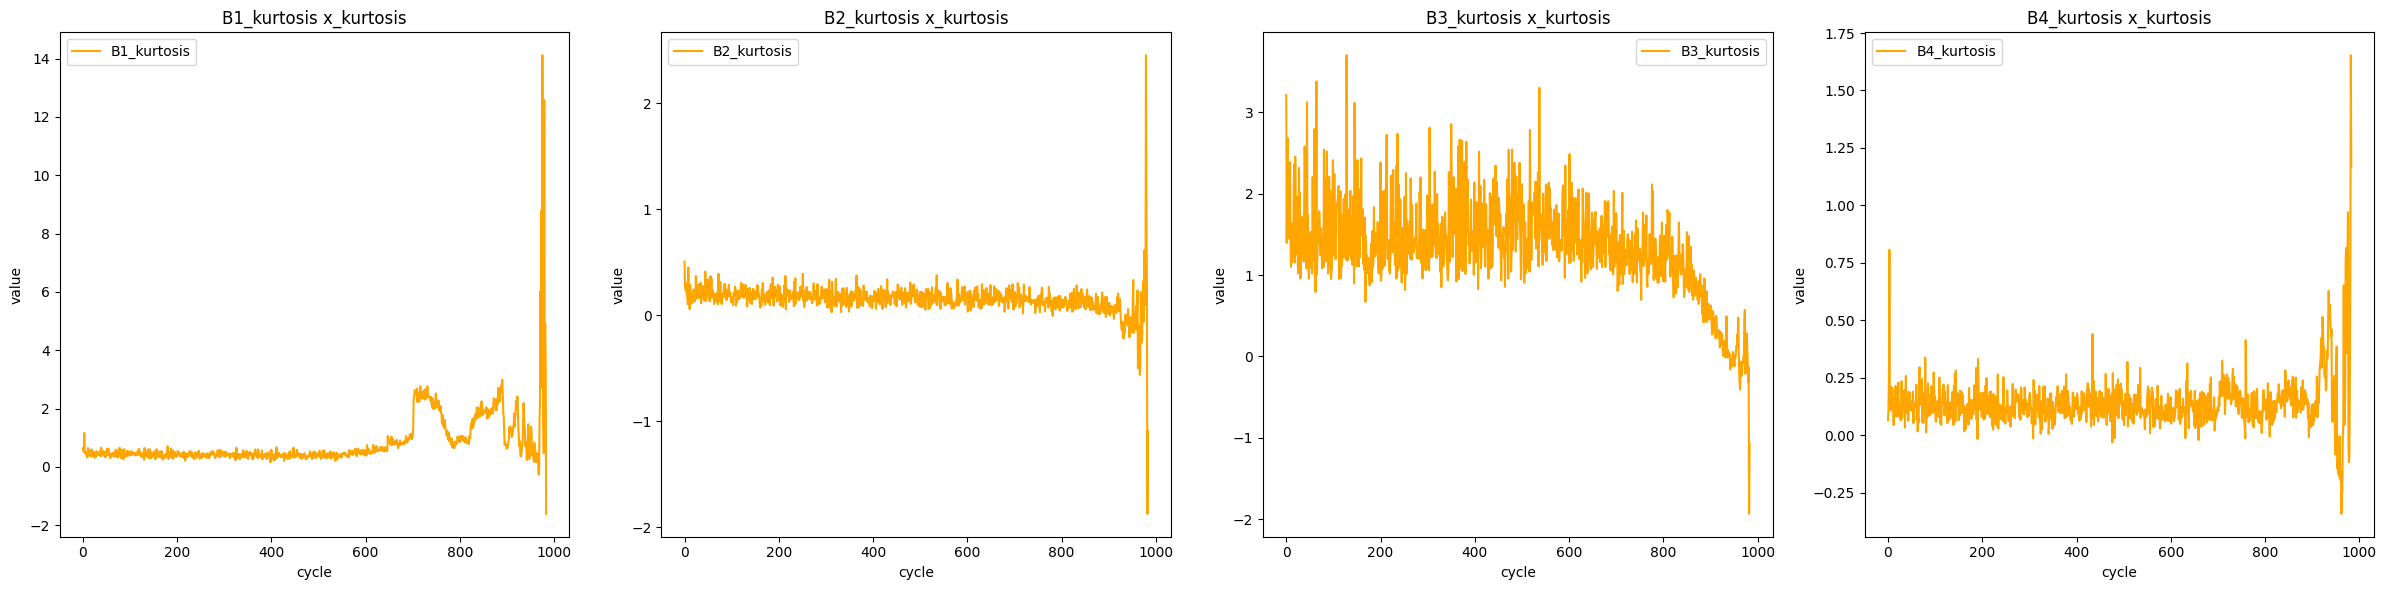

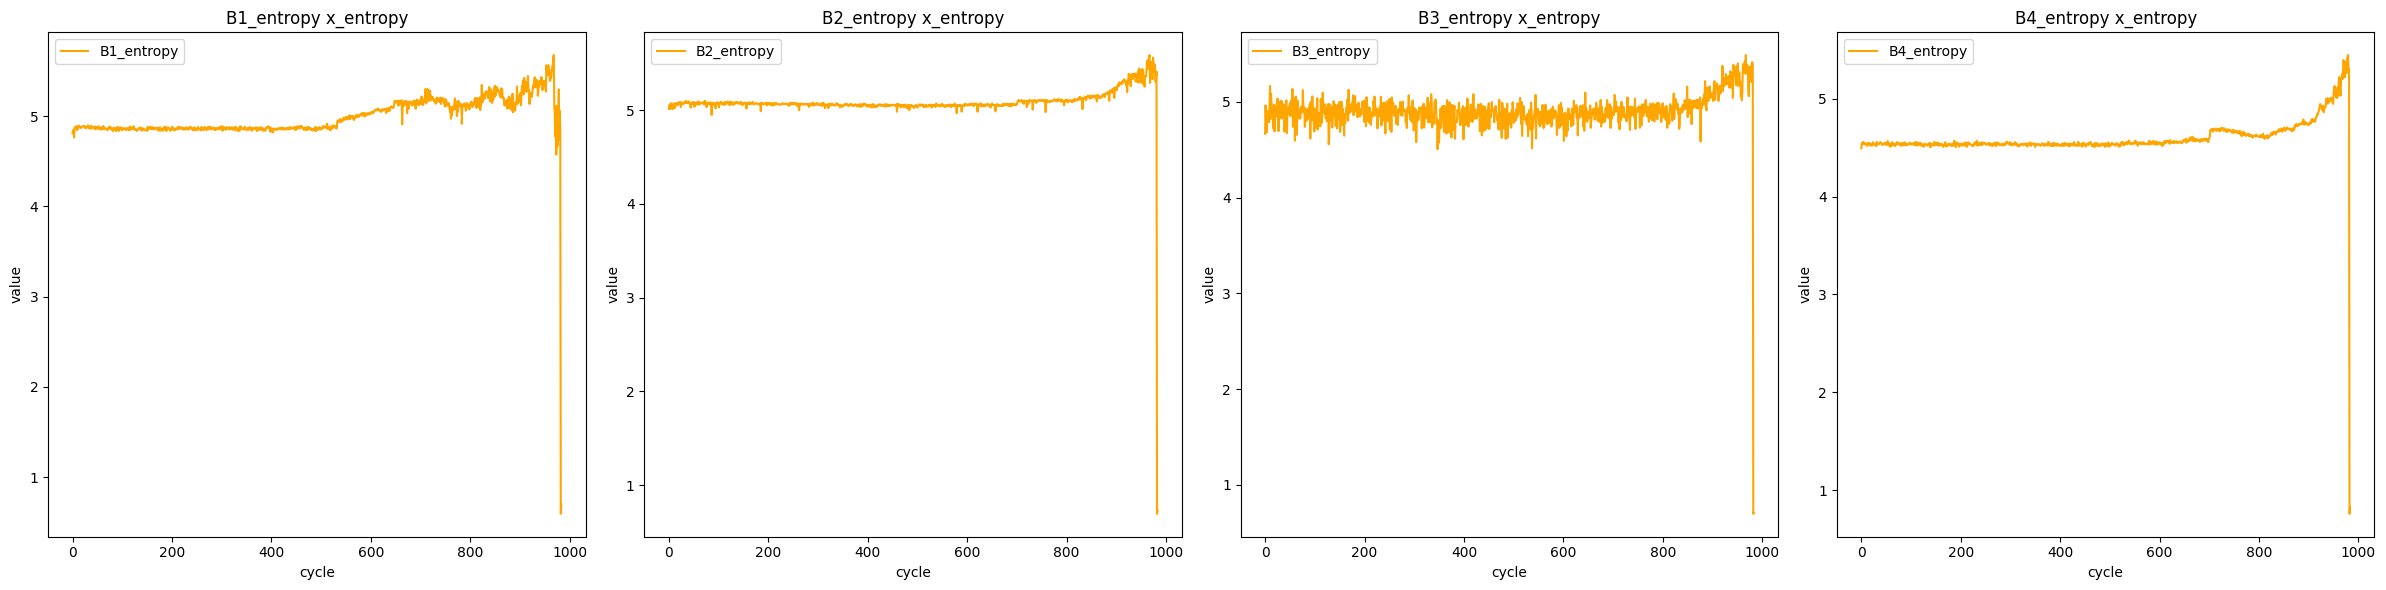

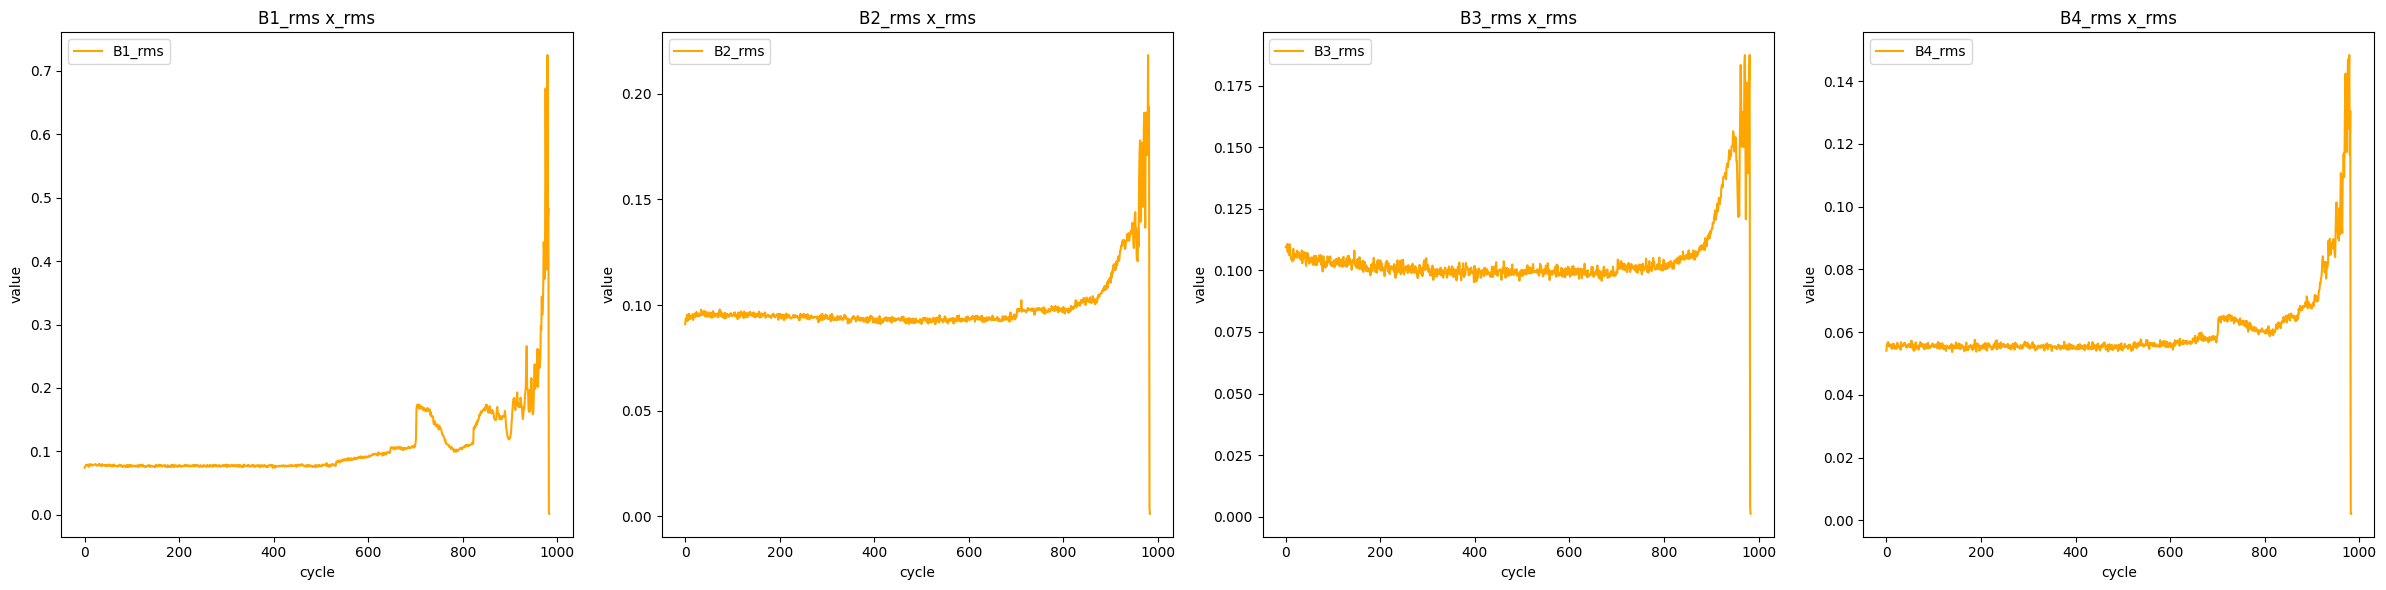

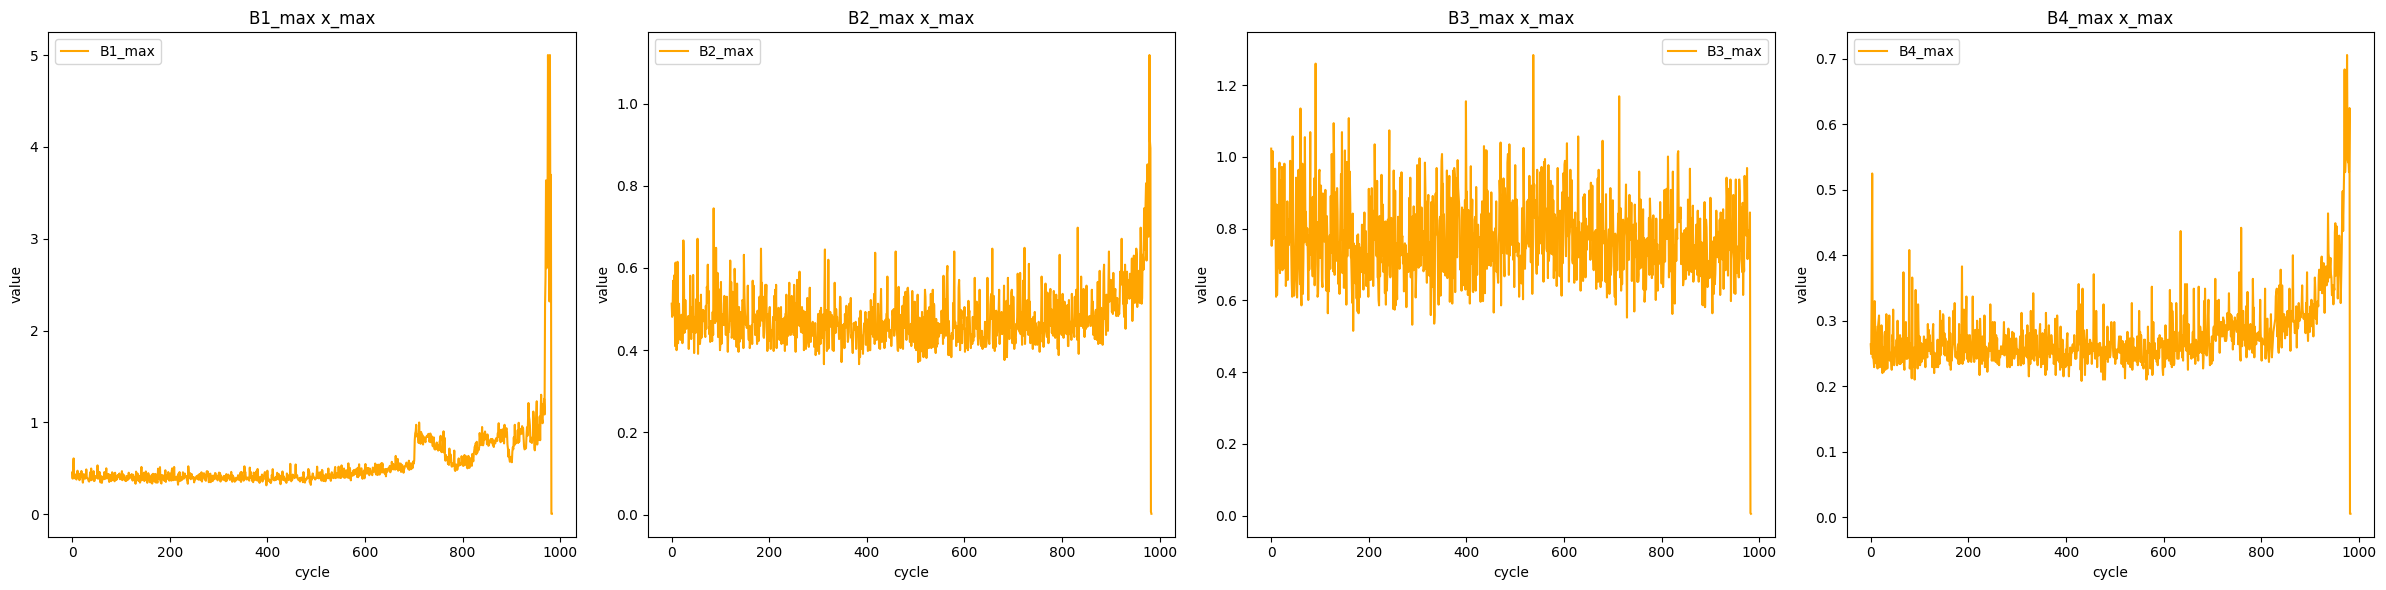

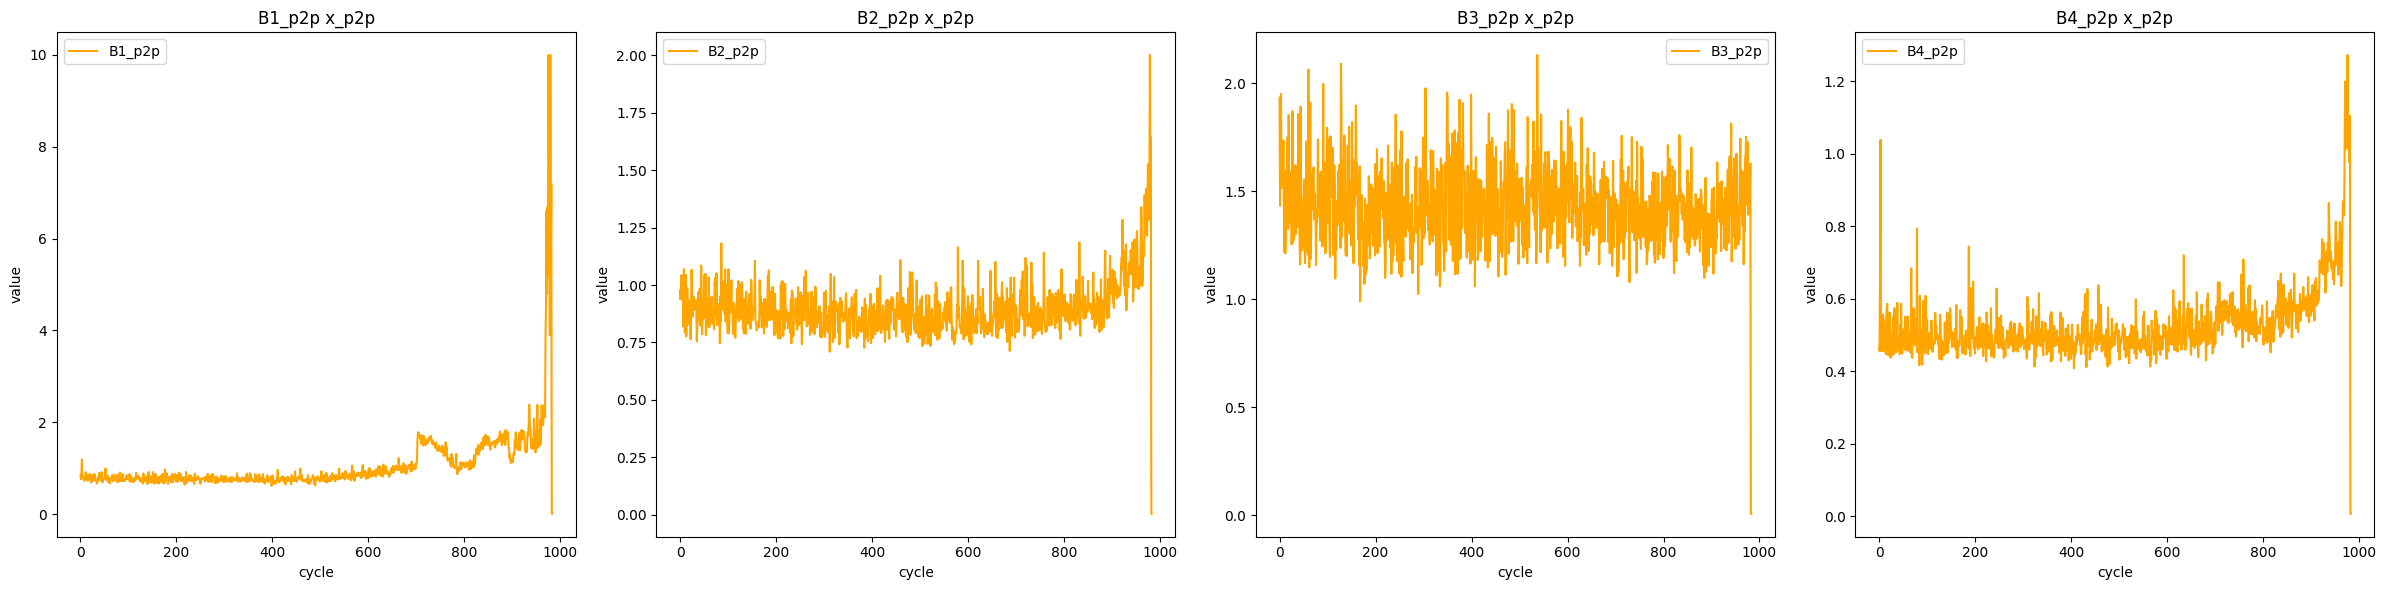

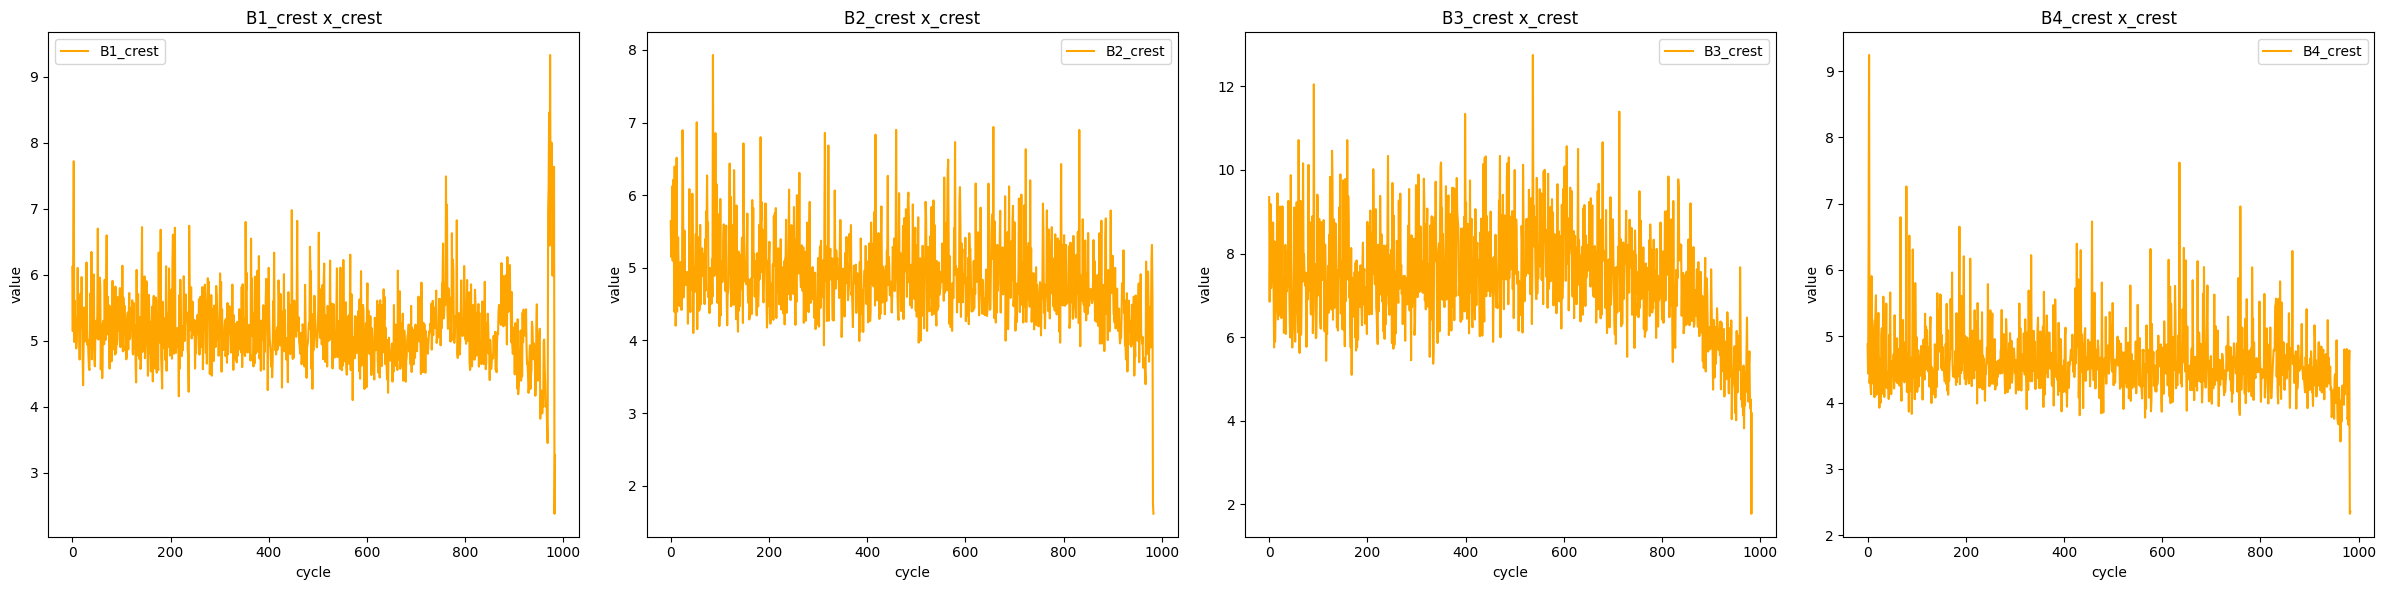

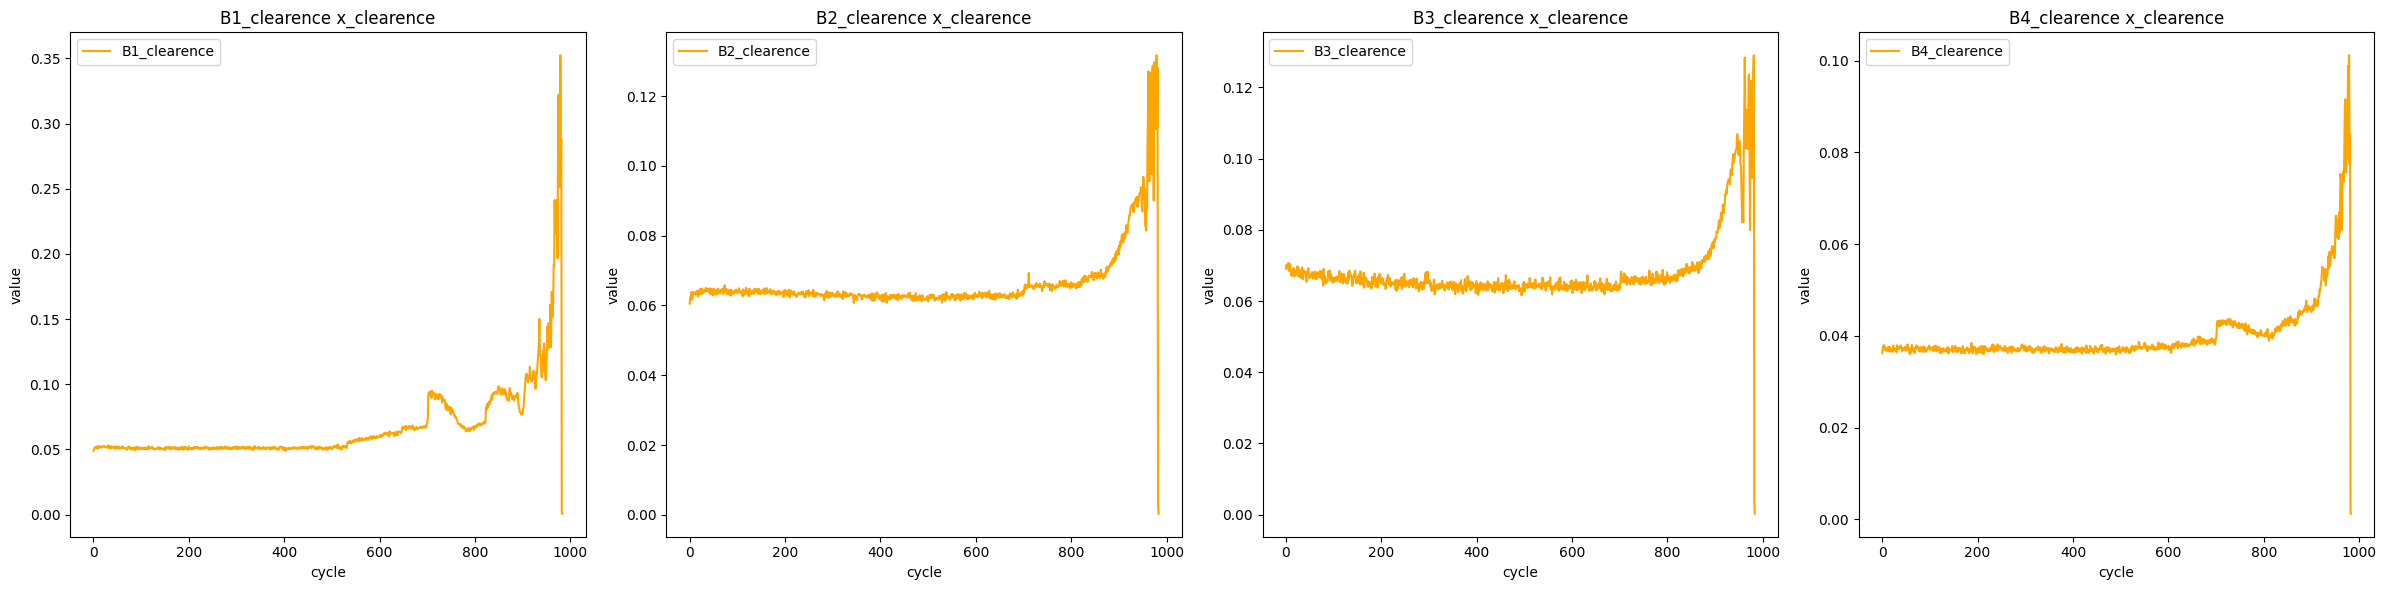

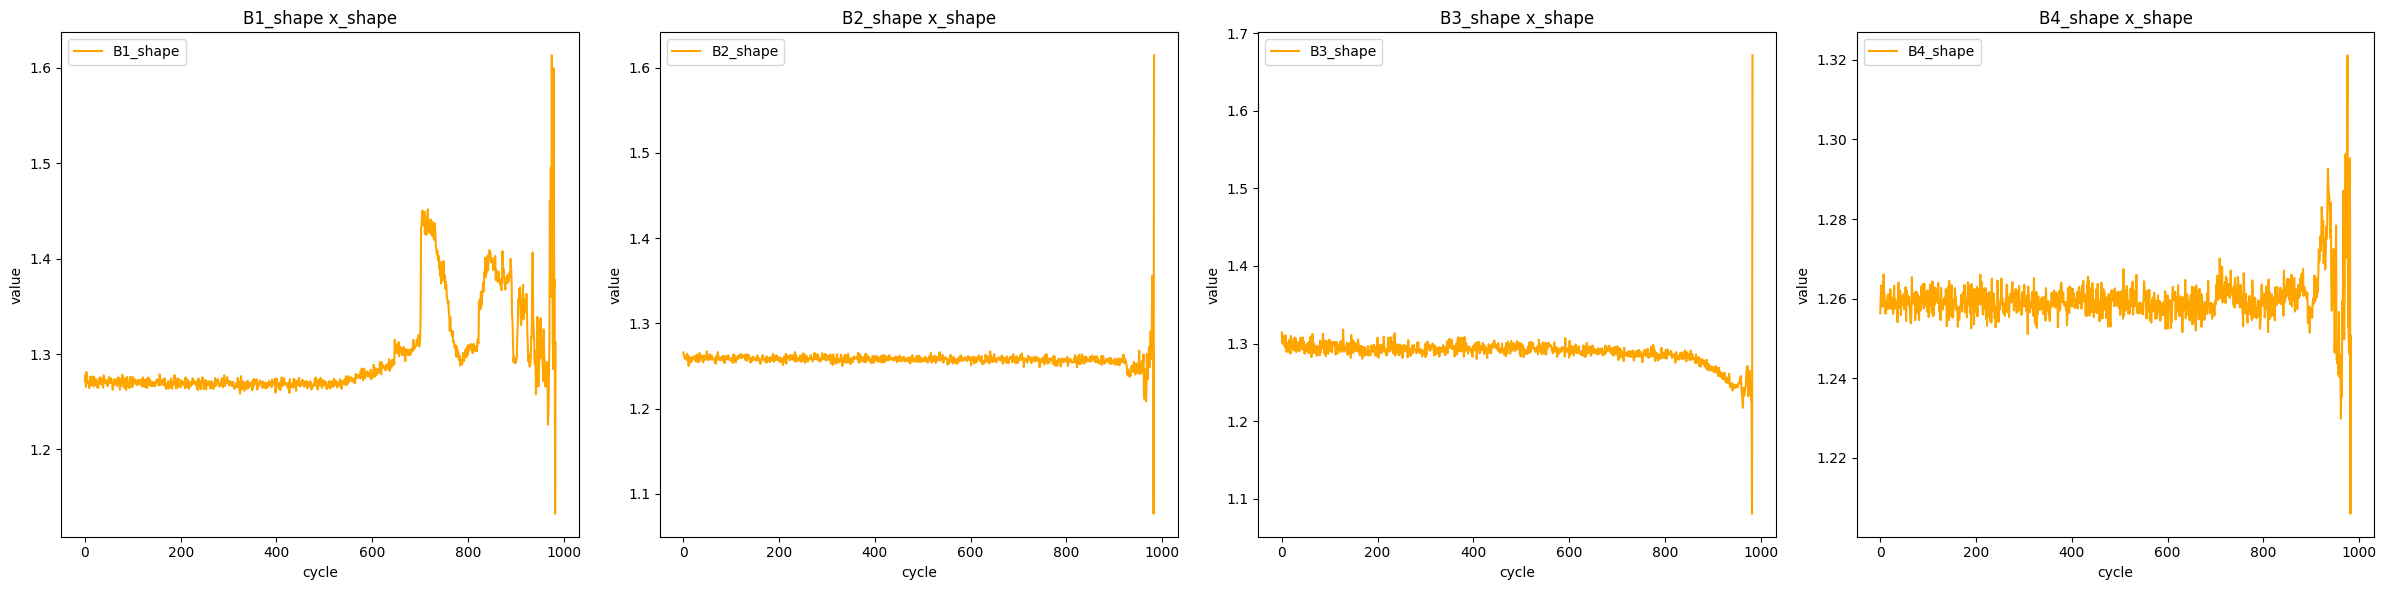

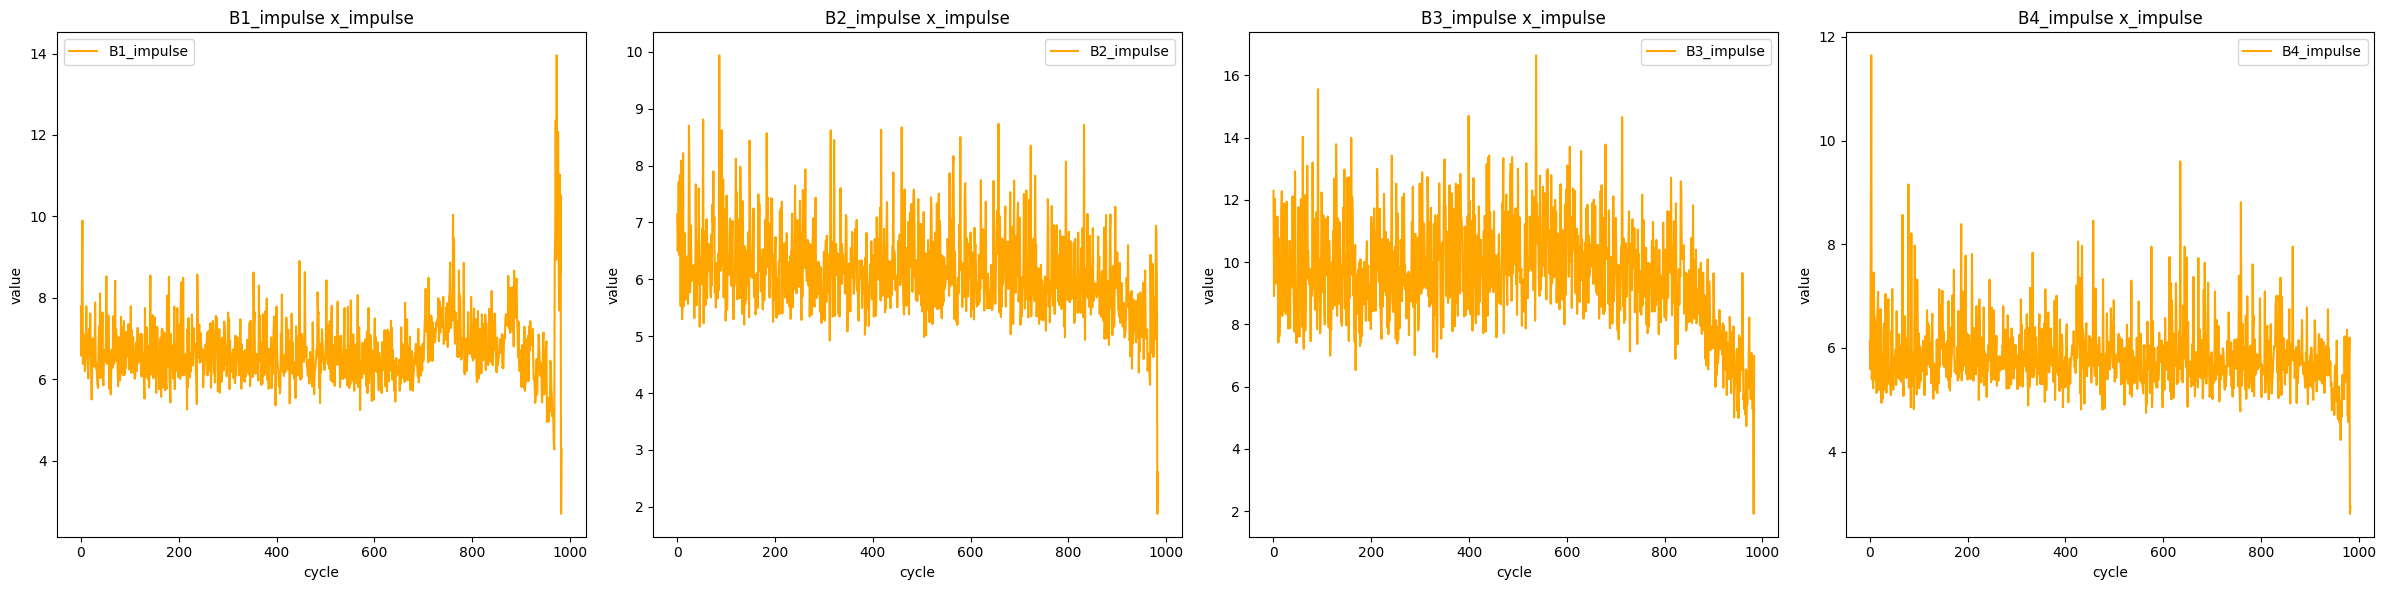

In [13]:
time_features_list = ["mean","std","skew","kurtosis","entropy","rms","max","p2p", "crest", "clearence", "shape", "impulse"]
bearings = ["B" + str(n) for n in range(1, 5)]
print("bearing detail", bearings)

for tf in time_features_list:
    fig = plt.figure(figsize=(24, 6))
    axes = []

    for i in range(4):
        ax = fig.add_subplot(1, 4, i + 1)
        axes.append(ax)

        col = bearings[i] + "_" + tf
        set2[col].plot(title="{} x_{}".format(col, tf), color = "orange", legend=True, ax=ax)
        ax.set(xlabel="cycle", ylabel="value")

    plt.tight_layout()
    plt.show()


In [14]:
#Health Status labels are added according to following dictionary
B1 ={
    "early" : ["2003-10-22 12:06:24" , "2003-10-23 09:14:13"],
    "suspect" : ["2003-10-23 09:24:13" , "2003-11-08 12:11:44"],
    "normal" : ["2003-11-08 12:21:44" , "2003-11-19 21:06:07"],
    "suspect_1" : ["2003-11-19 21:16:07" , "2003-11-24 20:47:32"],
    "imminent_failure" : ["2003-11-24 20:57:32","2003-11-25 23:39:56"]
}
B2 = {
    "early" : ["2003-10-22 12:06:24" , "2003-11-01 21:41:44"],
    "normal" : ["2003-11-01 21:51:44" , "2003-11-24 01:01:24"],
    "suspect" : ["2003-11-24 01:11:24" , "2003-11-25 10:47:32"],
    "imminent_failure" : ["2003-11-25 10:57:32" , "2003-11-25 23:39:56"]
}

B3 = {
    "early" : ["2003-10-22 12:06:24" , "2003-11-01 21:41:44"],
    "normal" : ["2003-11-01 21:51:44" , "2003-11-22 09:16:56"],
    "suspect" : ["2003-11-22 09:26:56" , "2003-11-25 10:47:32"],
    "Inner_race_failure" : ["2003-11-25 10:57:32" , "2003-11-25 23:39:56"]
}

B4 = {
    "early" : ["2003-10-22 12:06:24" , "2003-10-29 21:39:46"],
    "normal" : ["2003-10-29 21:49:46" , "2003-11-15 05:08:46"],
    "suspect" : ["2003-11-15 05:18:46" , "2003-11-18 19:12:30"],
    "Rolling_element_failure" : ["2003-11-19 09:06:09" , "2003-11-22 17:36:56"],
    "Stage_two_failure" : ["2003-11-22 17:46:56" , "2003-11-25 23:39:56"]
}

**Adding labels to the dataframe**

In [15]:
B1_state = list()
B2_state = list()
B3_state = list()
B4_state = list()
cnt = 0

for row in set2["time"]:
    cnt += 1
    # B1
    if cnt<=151:
        B1_state.append("early")
    if 151 < cnt <=600:
        B1_state.append("suspect")
    if 600 < cnt <=1499:
        B1_state.append("normal")
    if 1499 < cnt <=2098:
        B1_state.append("suspect")
    if 2098 < cnt <= 2156:
        B1_state.append("imminent_failure")
    #B2
    if cnt<=500:
        B2_state.append("early")
    if 500 < cnt <=2000:
        B2_state.append("normal")
    if 2000 < cnt <=2120:
        B2_state.append("suspect")
    if 2120< cnt <=2156:
        B2_state.append("imminent_failure")

    #B3
    if cnt<=500:
        B3_state.append("early")
    if 500 < cnt <= 1790:
        B3_state.append("normal")
    if 1790 < cnt <=2120:
        B3_state.append("suspect")
    if 2120 < cnt <=2156:
        B3_state.append("Inner_race_failure")
    #B4
    if cnt<=200:
        B4_state.append("early")
    if 200 < cnt <=1000:
        B4_state.append("normal")
    if 1000 < cnt <= 1435:
        B4_state.append("suspect")
    if 1435 < cnt <=1840:
        B4_state.append("Inner_race_failure")
    if 1840 < cnt <=2156:
        B4_state.append("Stage_two_failure")
#controlling the counts
from collections import Counter
print(Counter(B1_state))
print(Counter(B2_state))
print(Counter(B3_state))
print(Counter(B4_state))

set2["B1_state"] = B1_state
set2["B2_state"] = B2_state
set2["B3_state"] = B3_state
set2["B4_state"] = B4_state

set2.head()

Counter({'suspect': 449, 'normal': 384, 'early': 151})
Counter({'early': 500, 'normal': 484})
Counter({'early': 500, 'normal': 484})
Counter({'normal': 784, 'early': 200})


,time,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,...,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse,B1_state,B2_state,B3_state,B4_state
0,2004-02-12 10:32:39,0.058333,0.073478,0.083929,0.629118,4.811406,0.074180,0.454,0.840,6.120246,...,0.264,0.457,4.879424,0.036259,1.256305,6.130047,early,early,early,early
1,2004-02-12 10:42:39,0.058995,0.075339,0.052054,0.648930,4.835310,0.075382,0.388,0.757,5.147132,...,0.249,0.478,4.438343,0.037465,1.259558,5.590350,early,early,early,early
2,2004-02-12 10:52:39,0.060236,0.076189,0.032869,0.514258,4.848343,0.076228,0.503,0.903,6.598658,...,0.354,0.688,6.304948,0.037331,1.263332,7.965243,early,early,early,early
3,2004-02-12 11:02:39,0.061455,0.078694,0.041523,1.158352,4.761551,0.078726,0.608,1.184,7.723037,...,0.525,1.038,9.241630,0.037989,1.260124,11.645601,early,early,early,early
4,2004-02-12 11:12:39,0.061361,0.078440,0.028134,0.603647,4.875062,0.078475,0.391,0.782,4.982488,...,0.244,0.456,4.292638,0.037949,1.259831,5.407997,early,early,early,early


**Splitting each bearing data and adding them end to end vertically**

In [19]:
B1_cols = [col for col in set2.columns if "B1" in col]
B2_cols = [col for col in set2.columns if "B2" in col]
B3_cols = [col for col in set2.columns if "B3" in col]
B4_cols = [col for col in set2.columns if "B4" in col]

B1 = set2[B1_cols]
B2 = set2[B2_cols]
B3 = set2[B3_cols]
B4 = set2[B4_cols]
cols = ['B_mean','B_std','B_skew','B_kurtosis','B_entropy','B_rms','B_max','B_p2p','B_crest', 'B_clearence', 'B_shape', 'B_impulse',
        'class']
B1.columns = cols
B2.columns = cols
B3.columns = cols
B4.columns = cols
final_data = pd.concat([B1,B2,B3,B4], axis=0, ignore_index=True)
final_data.describe()
final_data.head()


# start_count = 151
# end_count = 2000
# filtered_df = final_data.iloc[start_count - 1: end_count]
# # Print the filtered data
# #print(filtered_df['cols'])
# filtered_df.head(2141)

,B_mean,B_std,B_skew,B_kurtosis,B_entropy,B_rms,B_max,B_p2p,B_crest,B_clearence,B_shape,B_impulse,class
0,0.058333,0.073478,0.083929,0.629118,4.811406,0.074180,0.454,0.840,6.120246,0.049037,1.271667,7.782918,early
1,0.058995,0.075339,0.052054,0.648930,4.835310,0.075382,0.388,0.757,5.147132,0.049523,1.277761,6.576805,early
2,0.060236,0.076189,0.032869,0.514258,4.848343,0.076228,0.503,0.903,6.598658,0.050765,1.265474,8.350427,early
3,0.061455,0.078694,0.041523,1.158352,4.761551,0.078726,0.608,1.184,7.723037,0.051553,1.281018,9.893347,early
4,0.061361,0.078440,0.028134,0.603647,4.875062,0.078475,0.391,0.782,4.982488,0.051293,1.278909,6.372151,early
